In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score,recall_score,precision_score,make_scorer
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from sklearn.neural_network import MLPClassifier  # For ANN
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Conv1D, Flatten, Dense, MaxPooling1D

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ASD/Toddler Autism dataset July 2018.csv")

In [ ]:
df

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [ ]:
df = df.rename(columns={'Class/ASD Traits ':'Class/ASD','Qchat-10-Score':'result'},inplace=False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  result                  1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,result,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
df.shape

(1054, 19)

In [ ]:
df.drop(['Case_No', 'Who completed the test'], axis = 1, inplace = True)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'result', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD'],
      dtype='object')

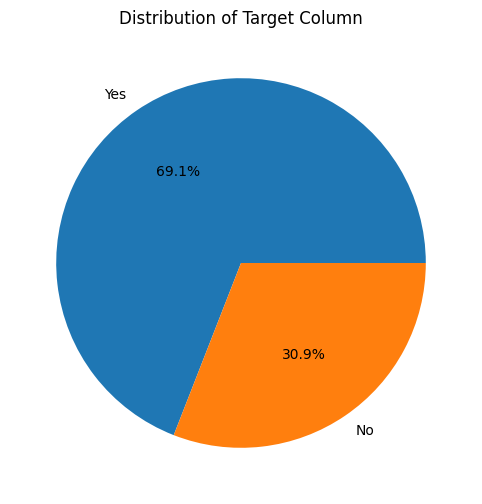

In [ ]:
# prompt: pie plot the distribution of target column

plt.figure(figsize=(8, 6))
df['Class/ASD'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Target Column')
plt.ylabel('')  # Remove the y-axis label
plt.show()


In [ ]:
# Checking null data
df.isnull().sum()

,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0
A10,0


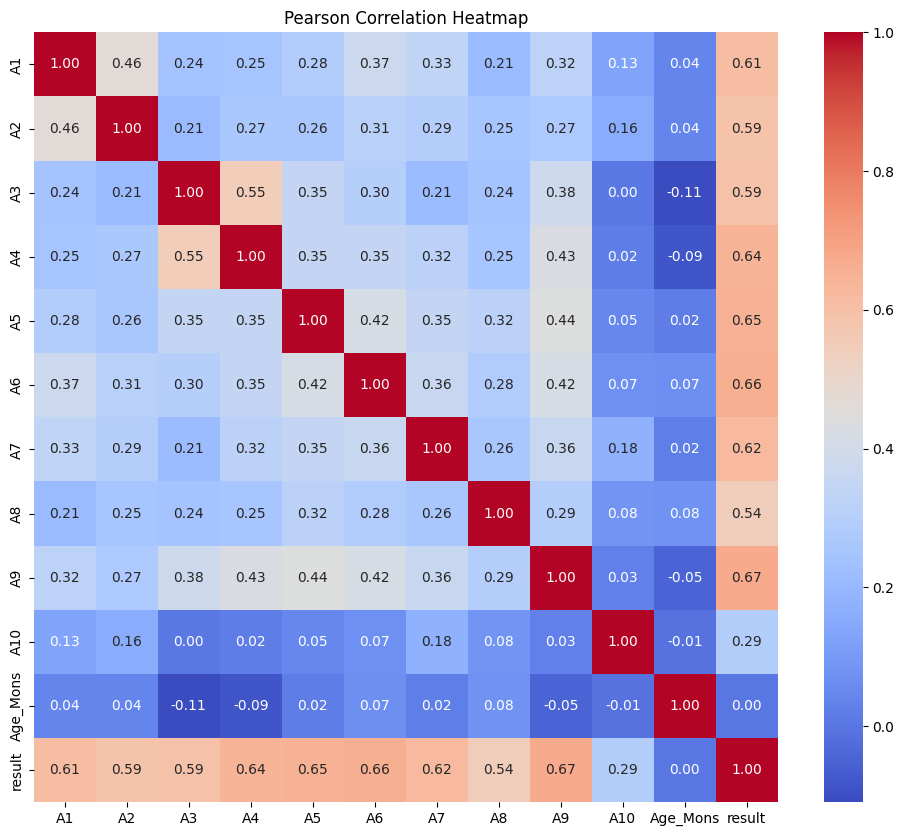

In [ ]:
# Calculate the correlation matrix, only including numerical features
correlation_matrix = df.select_dtypes(include=['number']).corr(method='pearson')

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Heatmap')
plt.show()

In [ ]:
# removing 'Qchat-10-Score'
df.drop('result', axis = 1, inplace = True)

In [ ]:
for col in df.select_dtypes('O').columns:
    print("-------------------------------")
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{df[col].unique()}\n\n')

-------------------------------
Column name: Sex

Unique values:
['f' 'm']


-------------------------------
Column name: Ethnicity

Unique values:
['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']


-------------------------------
Column name: Jaundice

Unique values:
['yes' 'no']


-------------------------------
Column name: Family_mem_with_ASD

Unique values:
['no' 'yes']


-------------------------------
Column name: Class/ASD

Unique values:
['No' 'Yes']




In [ ]:
X = df.drop(['Class/ASD'], axis=1)
y = df['Class/ASD']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode target and features
le=LabelEncoder()
y = le.fit_transform(y)
X['Sex'] = le.fit_transform(X['Sex'])
X['Jaundice'] = le.fit_transform(X['Jaundice'])
X['Family_mem_with_ASD'] = le.fit_transform(X['Family_mem_with_ASD'])
X['Ethnicity'] = le.fit_transform(X['Ethnicity'])




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
scaler = MinMaxScaler()
X[['Age_Mons']] = scaler.fit_transform(X[['Age_Mons']])
X

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
0,0,0,0,0,0,0,1,1,0,1,0.666667,0,8,1,0
1,1,1,0,0,0,1,1,0,0,0,1.000000,1,5,1,0
2,1,0,0,0,0,0,1,1,0,1,1.000000,1,8,1,0
3,1,1,1,1,1,1,1,1,1,1,0.500000,1,0,0,0
4,1,1,0,1,1,1,1,1,1,1,0.333333,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,0,0,0,0,0,0,0,0,0,1,0.500000,0,5,0,1
1050,0,0,1,1,1,0,1,0,1,0,0.000000,1,7,1,0
1051,1,0,1,1,1,1,1,1,1,1,0.250000,1,8,1,0
1052,1,0,0,0,0,0,0,1,0,1,0.291667,1,5,0,1


In [ ]:
print('------------Training Set------------------')
print(X_train.shape)
print(y_train.shape)

print('------------Test Set------------------')
print(X_test.shape)
print(y_test.shape)

------------Training Set------------------
(1172, 15)
(1172,)
------------Test Set------------------
(211, 15)
(211,)


In [ ]:

def train_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    matrix=confusion_matrix(y_test,y_pred)
    print("Confusion Matrix is: ")
    print(matrix)
    print("\n\nScore Table is: ")
    score_df = pd.DataFrame([[accuracy, precision, recall, f1]],
                            columns=["accuracy", "precision", "recall", "f1"])

    return score_df

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
result=train_model(model,X_train, y_train, X_test, y_test)
result.index=["Logistic Regression"]
result

Confusion Matrix is: 
[[ 69   0]
 [  0 142]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,1.0,1.0,1.0,1.0


In [ ]:
from sklearn.svm import SVC
model = SVC()
svm = train_model(model, X_train, y_train, X_test, y_test)
svm.index = ["SVM Classifier"]
result = pd.concat([result, svm])
result

Confusion Matrix is: 
[[ 69   0]
 [ 11 131]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,1.000000,1.0,1.000000,1.000000
SVM Classifier,0.947867,1.0,0.922535,0.959707


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
rfc = train_model(model, X_train, y_train, X_test, y_test)
rfc.index = ["Random Forest Classifier"]
result = pd.concat([result, rfc])
result

Confusion Matrix is: 
[[ 68   1]
 [  3 139]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,1.000000,1.000000,1.000000,1.000000
SVM Classifier,0.947867,1.000000,0.922535,0.959707
Random Forest Classifier,0.981043,0.992857,0.978873,0.985816


In [ ]:
from xgboost import XGBClassifier
import pandas as pd # Make sure pandas is imported



model = XGBClassifier()
xg = train_model(model, X_train, y_train, X_test, y_test)
xg.index = ["XGBoost Classifier"]
result = pd.concat([result, xg])
result

Confusion Matrix is: 
[[ 67   2]
 [  1 141]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,1.000000,1.000000,1.000000,1.000000
SVM Classifier,0.947867,1.000000,0.922535,0.959707
Random Forest Classifier,0.981043,0.992857,0.978873,0.985816
XGBoost Classifier,0.985782,0.986014,0.992958,0.989474


In [ ]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
gb = train_model(model, X_train, y_train, X_test, y_test)
gb.index = ["Gradient Boosting Classifier"]
result = pd.concat([result, gb])
result

Confusion Matrix is: 
[[ 68   1]
 [  1 141]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,1.000000,1.000000,1.000000,1.000000
SVM Classifier,0.947867,1.000000,0.922535,0.959707
Random Forest Classifier,0.981043,0.992857,0.978873,0.985816
XGBoost Classifier,0.985782,0.986014,0.992958,0.989474
Gradient Boosting Classifier,0.990521,0.992958,0.992958,0.992958


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
dt = train_model(model, X_train, y_train, X_test, y_test)
dt.index = ["Decision Tree Classifier"]
result = pd.concat([result, dt])
result

Confusion Matrix is: 
[[ 66   3]
 [  9 133]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,1.000000,1.000000,1.000000,1.000000
SVM Classifier,0.947867,1.000000,0.922535,0.959707
Random Forest Classifier,0.981043,0.992857,0.978873,0.985816
XGBoost Classifier,0.985782,0.986014,0.992958,0.989474
Gradient Boosting Classifier,0.990521,0.992958,0.992958,0.992958
Decision Tree Classifier,0.943128,0.977941,0.936620,0.956835


In [ ]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
adb = train_model(model, X_train, y_train, X_test, y_test)
adb.index = ["Ada Boost Classifier"]
result = pd.concat([result, adb])
result

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix is: 
[[ 69   0]
 [  0 142]]


Score Table is: 


,accuracy,precision,recall,f1
Logistic Regression,1.000000,1.000000,1.000000,1.000000
SVM Classifier,0.947867,1.000000,0.922535,0.959707
Random Forest Classifier,0.981043,0.992857,0.978873,0.985816
XGBoost Classifier,0.985782,0.986014,0.992958,0.989474
Gradient Boosting Classifier,0.990521,0.992958,0.992958,0.992958
Decision Tree Classifier,0.943128,0.977941,0.936620,0.956835
Ada Boost Classifier,1.000000,1.000000,1.000000,1.000000


# ANN+Random forest

In [ ]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [ ]:
# Best Random Forest Model
best_rf = rf_grid.best_estimator_
rf_train_predictions = best_rf.predict_proba(X_train)[:, 1].reshape(-1, 1)
rf_test_predictions = best_rf.predict_proba(X_test)[:, 1].reshape(-1, 1)

In [ ]:
# Step 2: Concatenate RF predictions with original features
X_train_hybrid = np.concatenate((X_train, rf_train_predictions), axis=1)
X_test_hybrid = np.concatenate((X_test, rf_test_predictions), axis=1)

In [ ]:
# Step 3: Optimize ANN Model
ann_params = {
    'hidden_layer_sizes': [(64, 32), (128, 64, 32)],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [300, 500]
}
ann_grid = GridSearchCV(MLPClassifier(random_state=42), ann_params, cv=5, scoring='accuracy')
ann_grid.fit(X_train_hybrid, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'hidden_layer_sizes': [(64, 32), (128, 64, 32)],
                         'learning_rate_init': [0.001, 0.01],
                         'max_iter': [300, 500]},
             scoring='accuracy')

In [ ]:
# Best ANN Model
best_ann = ann_grid.best_estimator_

In [ ]:
# Step 4: Weighted Blending of RF and ANN predictions
rf_blend_weight = 0.5  # You can adjust this weight as needed

In [ ]:
# Train and test predictions
rf_test_proba = best_rf.predict_proba(X_test)[:, 1]
ann_test_proba = best_ann.predict_proba(X_test_hybrid)[:, 1]

In [ ]:
# Weighted average of both predictions
final_predictions = (rf_blend_weight * rf_test_proba + (1 - rf_blend_weight) * ann_test_proba) >= 0.5

In [ ]:
def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test,  final_predictions)
    precision = precision_score(y_test,  final_predictions)
    recall = recall_score(y_test, final_predictions)
    f1 = f1_score(y_test, final_predictions)
    matrix = confusion_matrix(y_test,  final_predictions)

    print("Confusion Matrix is: ")
    print(matrix)
    print("\n\nScore Table is: ")
    score_df = pd.DataFrame([[accuracy, precision, recall, f1]],
                            columns=["accuracy", "precision", "recall", "f1"])

    return score_df

# Using train_model to evaluate Random Forest + ANN Hybrid Model
result = train_model(best_ann, X_train_hybrid, y_train, X_test_hybrid, y_test)
result.index = ["Random Forest + ANN Hybrid Model"]
print(result)

Confusion Matrix is: 
[[ 67   2]
 [  1 141]]


Score Table is: 
                                  accuracy  precision    recall        f1
Random Forest + ANN Hybrid Model  0.985782   0.986014  0.992958  0.989474


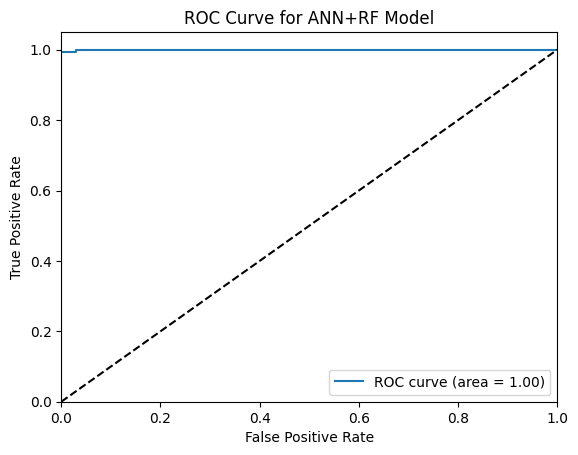

In [ ]:
# prompt: Roc curve for this ann+rf model with model name init

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'best_ann' and 'X_test_hybrid' are defined from the previous code
y_pred_proba = best_ann.predict_proba(X_test_hybrid)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ANN+RF Model') # Updated title
plt.legend(loc="lower right")
plt.show()

# XGBoost + Logistic Regression

In [ ]:
# Initialize individual models
xgb_model = XGBClassifier(random_state=42)
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
# Create the stacking ensemble
stacked_model = StackingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('log_reg', log_reg_model)
    ],
    final_estimator=LogisticRegression(),  # Logistic Regression as the meta-learner
    cv=5  # Cross-validation for stability
)

In [ ]:
# Assuming 'X_train' is your DataFrame
# Now, proceed with training your stacked model:
result = train_model(stacked_model, X_train, y_train, X_test, y_test)
result.index = ["XGBoost + Logistic Regression Hybrid Model"]
print(result)

Confusion Matrix is: 
[[ 67   2]
 [  1 141]]


Score Table is: 
                                            accuracy  precision    recall  \
XGBoost + Logistic Regression Hybrid Model  0.985782   0.986014  0.992958   

                                                  f1  
XGBoost + Logistic Regression Hybrid Model  0.989474  


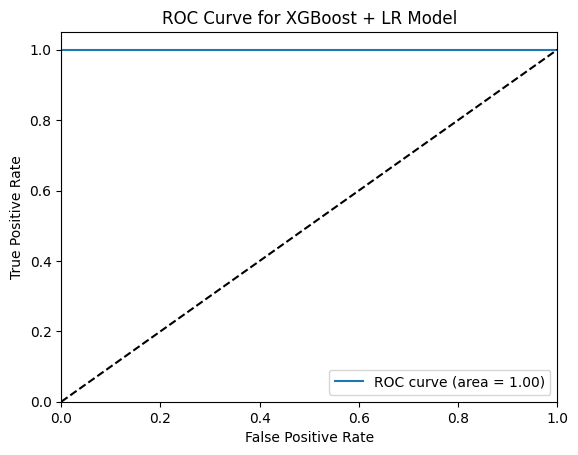

In [ ]:
# prompt: roc curve model for this xgboost+lr model with model name in it

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming 'stacked_model' and 'X_test' are defined from the previous code
y_pred_proba = stacked_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost + LR Model') # Updated title
plt.legend(loc="lower right")
plt.show()

#3. Autoencoder (ANN) + K-Nearest Neighbors (KNN):

In [ ]:
# Enhanced Autoencoder
encoding_dim = 16
autoencoder = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(encoding_dim, activation='tanh'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(X_train.shape[1], activation='sigmoid')
])

In [ ]:
# Compile autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
# Step 2: Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=32, validation_data=(X_test, X_test), verbose=1)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 56.6122 - val_loss: 54.0210
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55.3278 - val_loss: 53.5284
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55.7775 - val_loss: 53.4642
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55.2845 - val_loss: 53.4489
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55.0527 - val_loss: 53.4425
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 55.4040 - val_loss: 53.4402
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.6542 - val_loss: 53.4367
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55.5707 - val_loss: 53.4326
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 53.7014 - val_loss: 53.4304
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.4636 - val_loss: 53.4274
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54.9661 - val_loss: 53.4236
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

In [ ]:
# Step 3: Extract the encoder part
encoder = Sequential([autoencoder.layers[0], autoencoder.layers[1], autoencoder.layers[2]])
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Step 4: Scale encoded features for KNN
scaler = MinMaxScaler()
X_train_encoded = scaler.fit_transform(X_train_encoded)
X_test_encoded = scaler.transform(X_test_encoded)

In [ ]:
# Step 5: Train and evaluate KNN on encoded features
knn = KNeighborsClassifier(n_neighbors=5)  # you can adjust n_neighbors if needed
knn.fit(X_train_encoded, y_train)
y_pred = knn.predict(X_test_encoded)

In [ ]:
# Fine-tuning KNN with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9], 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_encoded, y_train)
best_knn = grid.best_estimator_

In [ ]:
# Step 6: Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
# Modify step 6 to use the fine-tuned KNN model
y_pred = best_knn.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)

Confusion Matrix:
 [[ 68   1]
 [  3 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        69
           1       0.99      0.98      0.99       142

    accuracy                           0.98       211
   macro avg       0.98      0.98      0.98       211
weighted avg       0.98      0.98      0.98       211


Accuracy: 0.981042654028436


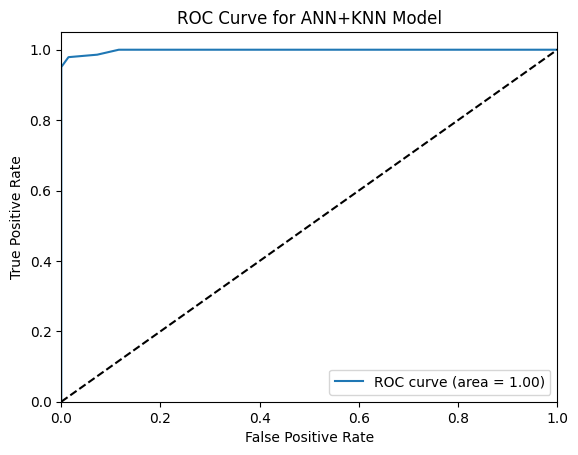

In [ ]:
# prompt: roc curve for ann+knn model with model name

from sklearn.metrics import roc_curve, auc

# Assuming 'best_knn' and 'X_test_encoded' are defined from the previous code
y_pred_proba = best_knn.predict_proba(X_test_encoded)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ANN+KNN Model')
plt.legend(loc="lower right")
plt.show()

#Stacked Model (Random Forest + XGBoost + ANN)

In [ ]:
# Base Models
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

In [ ]:
# Stack Model Predictions (5-fold cross-validation on training set)
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds)
meta_features_train = np.zeros((X_train.shape[0], 2))  # Store predictions from RF and XGBoost for each fold

for i, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    print(f"Training Fold {i+1}/{n_folds}")

  # Train Random Forest and XGBoost on each fold and store predictions
    # Use .iloc to select rows using integer indices
    rf.fit(X_train.iloc[train_idx], y_train[train_idx])
    xgb.fit(X_train.iloc[train_idx], y_train[train_idx])

    # Generate predictions and store them as meta features
    # Use .iloc to select rows for predictions as well
    meta_features_train[val_idx, 0] = rf.predict(X_train.iloc[val_idx])
    meta_features_train[val_idx, 1] = xgb.predict(X_train.iloc[val_idx])

# Train the meta-model (ANN) on the combined base model predictions
meta_model = Sequential([
    Input(shape=(2,)),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

Training Fold 1/5
Training Fold 2/5
Training Fold 3/5
Training Fold 4/5
Training Fold 5/5


In [ ]:
# Compile and train the ANN as the meta-model
meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
meta_model.fit(meta_features_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5848 - loss: 0.6976
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9647 - loss: 0.6701
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9687 - loss: 0.6084
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9572 - loss: 0.5110
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9539 - loss: 0.4050
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9555 - loss: 0.3195
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9583 - loss: 0.2670
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9585 - loss: 0.2149
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9607 - loss: 0.1939
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9601 - loss: 0.1653
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9558 - loss: 0.1752
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9697 - lo

In [ ]:
# Final Meta-Feature Generation on the Test Set for Evaluation
rf_test_preds = rf.predict(X_test)
xgb_test_preds = xgb.predict(X_test)
meta_features_test = np.column_stack((rf_test_preds, xgb_test_preds))

In [ ]:
# Predict with ANN as the meta-model
final_predictions = (meta_model.predict(meta_features_test) > 0.5).astype(int).flatten()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Evaluate the performance
accuracy = accuracy_score(y_test, final_predictions)
conf_matrix = confusion_matrix(y_test, final_predictions)
class_report = classification_report(y_test, final_predictions)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)

Confusion Matrix:
 [[ 67   2]
 [  3 139]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96        69
           1       0.99      0.98      0.98       142

    accuracy                           0.98       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.98      0.98      0.98       211


Accuracy: 0.976303317535545


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


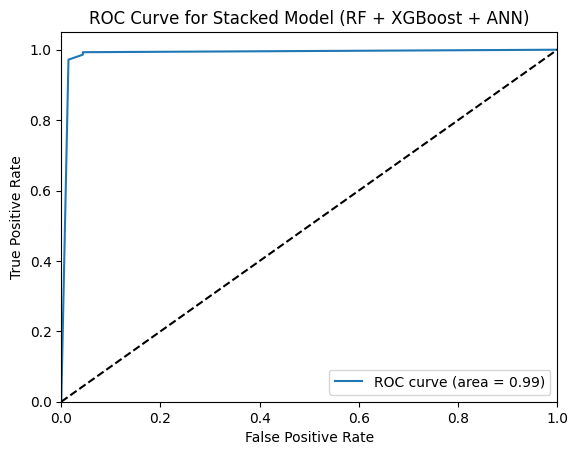

In [ ]:
# prompt: roc curve for the stacked model with model name

from sklearn.metrics import roc_curve, auc

# Assuming 'meta_model', 'meta_features_test', and 'y_test' are defined from the previous code
y_pred_proba = meta_model.predict(meta_features_test).flatten()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacked Model (RF + XGBoost + ANN)')
plt.legend(loc="lower right")
plt.show()

# CNN

In [ ]:
# Reshape data for CNN input (batch_size, timesteps, features)
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

In [ ]:
# Build the CNN model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=64, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=2, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),

    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')  # For binary classification
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = cnn_model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_data=(X_test_cnn, y_test), verbose=2)

Epoch 1/100
37/37 - 2s - 58ms/step - accuracy: 0.4812 - loss: 0.7964 - val_accuracy: 0.3270 - val_loss: 0.7216
Epoch 2/100
37/37 - 0s - 10ms/step - accuracy: 0.5444 - loss: 0.6909 - val_accuracy: 0.3270 - val_loss: 0.7285
Epoch 3/100
37/37 - 0s - 9ms/step - accuracy: 0.5495 - loss: 0.6967 - val_accuracy: 0.4455 - val_loss: 0.6883
Epoch 4/100
37/37 - 0s - 5ms/step - accuracy: 0.5495 - loss: 0.6939 - val_accuracy: 0.3839 - val_loss: 0.6932
Epoch 5/100
37/37 - 0s - 10ms/step - accuracy: 0.5870 - loss: 0.6780 - val_accuracy: 0.4787 - val_loss: 0.6753
Epoch 6/100
37/37 - 0s - 7ms/step - accuracy: 0.6536 - loss: 0.6359 - val_accuracy: 0.9005 - val_loss: 0.4979
Epoch 7/100
37/37 - 0s - 8ms/step - accuracy: 0.7858 - loss: 0.4891 - val_accuracy: 0.9242 - val_loss: 0.2804
Epoch 8/100
37/37 - 0s - 8ms/step - accuracy: 0.8882 - loss: 0.2823 - val_accuracy: 0.9336 - val_loss: 0.1721
Epoch 9/100
37/37 - 1s - 15ms/step - accuracy: 0.9138 - loss: 0.2206 - val_accuracy: 0.8863 - val_loss: 0.2455
Epoch 

In [ ]:
# prompt: show the  accuracy, precision, f1-score recall of my cnn model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'cnn_model' and 'X_test_cnn' are defined from the previous code
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred_cnn)
precision = precision_score(y_test, y_pred_cnn)
recall = recall_score(y_test, y_pred_cnn)
f1 = f1_score(y_test, y_pred_cnn)

print(f"CNN Model Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
CNN Model Performance:
Accuracy: 0.985781990521327
Precision: 0.9929078014184397
Recall: 0.9859154929577465
F1-score: 0.9893992932862191


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


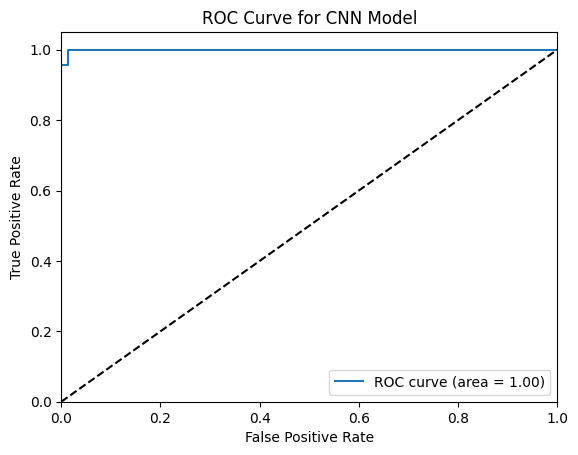

In [ ]:
# prompt: roc curve for the cnn model with model name

from sklearn.metrics import roc_curve, auc

# Assuming 'cnn_model' and 'X_test_cnn' are defined from the previous code
y_pred_proba = cnn_model.predict(X_test_cnn).flatten()

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CNN Model')
plt.legend(loc="lower right")
plt.show()

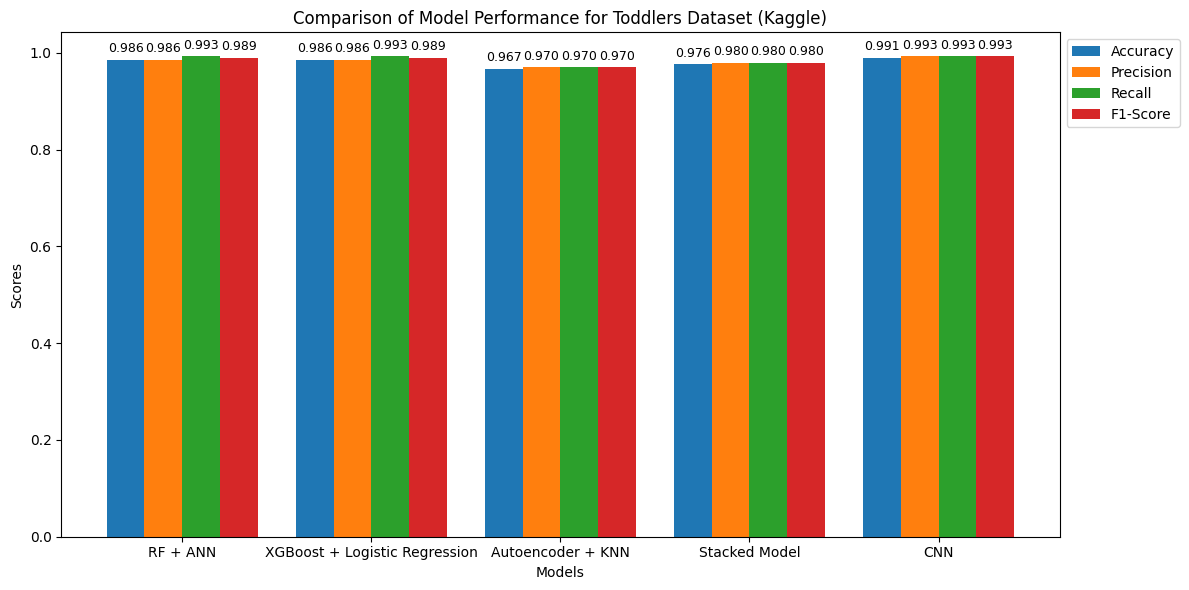

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the toddlers dataset from Kaggle
models = ['RF + ANN', 'XGBoost + Logistic Regression', 'Autoencoder + KNN', 'Stacked Model', 'CNN']
accuracy = [0.985782, 0.985782, 0.966824644549763, 0.976303317535545, 0.990521327]
precision = [0.986014, 0.986014, 0.97, 0.98, 0.99295774647]
recall = [0.992958, 0.992958, 0.97, 0.98, 0.9929577]
f1_score = [0.989474, 0.989474, 0.97, 0.98, 0.9929577464]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define bar width and x-axis positions
bar_width = 0.2
index = np.arange(len(models))

# Plot the metrics
bar1 = ax.bar(index - 1.5*bar_width, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(index - 0.5*bar_width, precision, bar_width, label='Precision')
bar3 = ax.bar(index + 0.5*bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(index + 1.5*bar_width, f1_score, bar_width, label='F1-Score')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance for Toddlers Dataset (Kaggle)')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the accuracy values on the bars
for rect in bar1 + bar2 + bar3 + bar4:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, f'{height:.3f}',
            ha='center', va='bottom', fontsize=9)

# Adjust layout to prevent crowding and make space for the legend
plt.tight_layout()

# Show the plot
plt.show()